# Inferencias ENOE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid",palette='pastel')

In [2]:
completat422 = pd.read_csv("completat422.csv")
base_descrip = completat422[["sex", "eda", "niv_ins", "t_loc_men", "anios_esc","clase1","clase2", 
                             "clase3", "rama", "c_ocu11c", "pos_ocu", "hrsocup", "imssissste",
                             "ing7c", "ingocup", "ing_x_hrs","p6b1", "p6b2", "p6c", "fac", "est_d_men", "upm"]]

In [3]:
# Condición para la nueva columna 'ingocup2'
condition = (base_descrip['pos_ocu'] != 4) & (base_descrip['p6b1'] > 6) & (base_descrip['ingocup'] == 0)
# Aplicar la condición y asignar valores a 'ingocup2' según la condición
base_descrip['ingocup2'] = np.where(condition, np.nan, base_descrip['ingocup'])

In [4]:
# Condición para la nueva columna 'anios_esc2'
condition = (base_descrip['anios_esc'] == 99)
# Aplicar la condición y asignar valores a 'anios_esc2' según la condición
base_descrip['anios_esc2'] = np.where(condition, np.nan, base_descrip['anios_esc'])

In [5]:
from scipy.stats import ttest_1samp
import scipy.stats as stats
filtered_data = base_descrip[~base_descrip['ingocup2'].isnull()]
conf = 0.95
expected_mean = 2*4246
media = np.mean(filtered_data['ingocup2'])
desv_est = np.std(filtered_data['ingocup2'], ddof=1)
val_critic = stats.t.ppf((1+0.95)/2, (len(filtered_data['ingocup2'])-1))
err_est = desv_est / np.sqrt(len(filtered_data['ingocup2']))
# Intervalos de confianza
intervalo_sup= media + val_critic * err_est
intervalo_inf= media - val_critic * err_est
print(f"Intervalo de confianza al {conf * 100}%: ({intervalo_inf:.2f}, {intervalo_sup:.2f})")
# Realizar la prueba t de una muestra para 'ingocup2'
t_statistic, p_value = ttest_1samp(filtered_data['ingocup2'], expected_mean, alternative="less")  # Prueba si la media es diferente de expected_mean
print(f"Estadístico de prueba (t-statistic): {t_statistic:.2f}")
print(f"Valor p (p-value): {p_value}")
print(f"Media de la serie: {media:.2f}")

Intervalo de confianza al 95.0%: (3780.79, 3829.09)
Estadístico de prueba (t-statistic): -380.34
Valor p (p-value): 0.0
Media de la serie: 3804.94


Para el cuarto trimestre del 2022, los trabajadores mexicanos ganaron con un 95% de confianza entre 3780.79 y 3829.09 pesos. 

In [6]:
dif_ing = base_descrip[base_descrip['clase2']==1]
summary_stats = dif_ing.groupby('sex').agg(
    media=('ingocup2', lambda x: np.mean(x.dropna()))
).reset_index()
print(summary_stats)

   sex        media
0  1.0  8842.296350
1  2.0  6613.004022


In [7]:
from scipy.stats import ttest_ind
filtered_data = base_descrip[~base_descrip['ingocup2'].isnull()]
conf = 0.95
# Separar los datos por grupos según la variable 'sex'
# grupo 1
group1 = filtered_data[filtered_data['sex'] == 1]['ingocup2']
g1_media = np.mean(group1)
g1desv_est = np.std(group1, ddof=1)
# grupo 2
group2 = filtered_data[filtered_data['sex'] == 2]['ingocup2']
g2_media = np.mean(group2)
g2desv_est = np.std(group2, ddof=1)
# Realizar la prueba t de dos muestras para 'ingocup2' entre los grupos definidos por 'sex'
mean_difference = g1_media - g2_media
# Calcular el error estándar de la diferencia entre las medias
std_error_difference = ((g1desv_est ** 2) / len(group1) + (g2desv_est ** 2) / len(group2)) ** 0.5
# Calcular el intervalo de confianza al 95% para la diferencia entre las medias
confidence_interval = (mean_difference - 1.96 * std_error_difference, mean_difference + 1.96 * std_error_difference)
t_statistic, p_value = ttest_ind(group1, group2)
print("Estadístico de prueba (t-statistic):", t_statistic)
print("Valor p (p-value):", p_value)
print("Intervalo de confianza al 95% para la diferencia entre las medias:", confidence_interval)
print(f'Media 1: {g1_media}, Media 2: {g2_media}')

Estadístico de prueba (t-statistic): 125.9937263239377
Valor p (p-value): 0.0
Intervalo de confianza al 95% para la diferencia entre las medias: (2985.3891731153662, 3083.896324943433)
Media 1: 5475.089891649906, Media 2: 2440.447142620507


El grupo 1 queda definido por los hombres y el grupo 2 por mujeres. Lo mostrado en este caso denota que la diferencia de ingresos laborales estaría, con 95% de confianza, entre 2985.4 y 3083.9 pesos.

Al tener un valor *p* pequeño, podemos rechazar la hipotesis nula de que los ingresos laborales entre hombres y mujeres son diferentes

In [8]:
lower_interval = (g1_media-g2_media) - 1.96 * std_error_difference
t_statistic, p_value = ttest_ind(group1, group2, alternative='greater')
print(f"Estadístico de prueba (t-statistic): {t_statistic:.2f}")
print("Valor p (p-value):", p_value)
# print(f"Valor p (una cola) para la hipótesis nula {p_value/2}")
print("Intervalo unilateral inferior:", lower_interval.round(2))
print(f"Intervalo de confianza al 95% para la diferencia entre las medias: {confidence_interval}")
print(f'Media Hombres: {g1_media:.2f}, Media Mujeres: {g2_media:.2f}')

Estadístico de prueba (t-statistic): 125.99
Valor p (p-value): 0.0
Intervalo unilateral inferior: 2985.39
Intervalo de confianza al 95% para la diferencia entre las medias: (2985.3891731153662, 3083.896324943433)
Media Hombres: 5475.09, Media Mujeres: 2440.45


Con esta prueba rechazamos la hipótesis nula de que los hombres ganen menos o igual que las mujeres, por lo tanto, hay evidencia de que los ingresos de los hombres superan a los de las mujeres en las poblaciones. De igual manera señalamos que con un 95% de confianza, los hombres ganan al menos 2985.39 pesos más que las mujeres

Estos ejercicios muestran la disparidad de los ingresos por la condición de ser hombre o mujer en México. No obstante, cuando comparamos los ingresos entre hombres y mujeres, debemos tener claro que hay jornadas de trabajo muy diferenciadas. Debido a que las mujeres tienen una sobrecarga de trabajo no remunerada, trabajan menos horas de manera remunerada fuera de la unidad doméstica. Por lo tanto, para tratar de aislar el efecto de ser hombre o mujer en los ingresos, muchas veces se recomienda comparar los ingresos por hora y no así los ingresos totales. Ello evidencia con más robustez estas diferencias.

### Estimación de varianzas y sus pruebas de hipótesis

Las varianzas, a diferencia de las medias, se distribuyen con la función chi-cuadrado. Es la distribución de una suma de los cuadrados de k variables aleatorias distribuídas como normales estándar independientes.

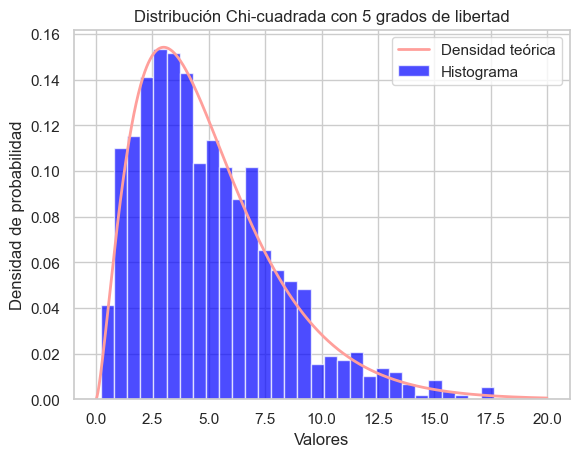

In [9]:
# Generar datos de una distribución chi-cuadrada
degrees_freedom = 5  # Grados de libertad
data = np.random.chisquare(degrees_freedom, 1000)  # Generar 1000 puntos
# Graficar el histograma de la distribución chi-cuadrada
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
# Añadir una línea que muestra la densidad de probabilidad teórica
x = np.linspace(0, 20, 1000)
pdf = np.exp(-x / 2) * (x ** (degrees_freedom / 2 - 1)) / (2 ** (degrees_freedom / 2) * np.math.gamma(degrees_freedom / 2))
plt.plot(x, pdf, 'r-', lw=2)
# Añadir etiquetas y título al gráfico
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Chi-cuadrada con {} grados de libertad'.format(degrees_freedom))
plt.legend(['Densidad teórica', 'Histograma'])
# Mostrar el gráfico
plt.show()

Heterogeneidades más altas pueden estar asociadas a la desigualdad

In [11]:
dmodelo = base_descrip[(base_descrip['clase2']==1)&(base_descrip['anios_esc']<99)&(base_descrip['ingocup2']>0)&(base_descrip['eda']<99)&(base_descrip['eda']>14)]
dmodelo.head()

,sex,eda,niv_ins,t_loc_men,anios_esc,clase1,clase2,clase3,rama,c_ocu11c,...,ingocup,ing_x_hrs,p6b1,p6b2,p6c,fac,est_d_men,upm,ingocup2,anios_esc2
0,2.0,61.0,2.0,NaN,6.0,1.0,1.0,1.0,4.0,8.0,...,2580.0,50.00000,3.0,2580.0,NaN,118.0,NaN,101039.0,2580.0,6.0
1,1.0,28.0,4.0,NaN,16.0,1.0,1.0,1.0,2.0,5.0,...,9600.0,47.50124,2.0,9600.0,NaN,118.0,NaN,101039.0,9600.0,16.0
2,1.0,24.0,4.0,NaN,15.0,1.0,1.0,1.0,2.0,1.0,...,9600.0,46.51163,2.0,9600.0,NaN,118.0,NaN,101039.0,9600.0,15.0
3,1.0,34.0,4.0,NaN,12.0,1.0,1.0,1.0,2.0,5.0,...,6880.0,33.33333,3.0,6880.0,NaN,118.0,NaN,101039.0,6880.0,12.0
5,1.0,53.0,3.0,NaN,9.0,1.0,1.0,1.0,2.0,5.0,...,7740.0,25.00000,4.0,7740.0,NaN,118.0,NaN,101039.0,7740.0,9.0


Relación entre ingresos y años de escolaridad. esta relación debe ser estudiada en términos de la evolución de los rendimientos, de la cohorte, de los sectores y de los niveles de sobreeducación.

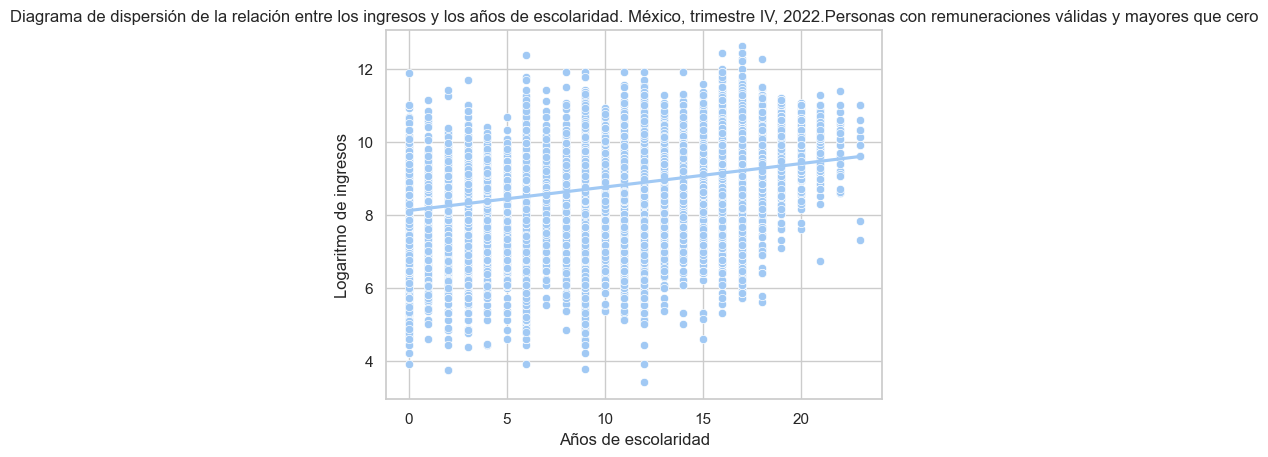

In [28]:
# Crear el gráfico de dispersión con línea de regresión
# plt.figure(figsize=(8, 6))
sns.scatterplot(data=dmodelo, x='anios_esc', y=np.log(dmodelo['ingocup2']))
sns.regplot(data=dmodelo, x='anios_esc', y=np.log(dmodelo['ingocup2']), scatter=False)
plt.xlabel('Años de escolaridad')
plt.ylabel('Logaritmo de ingresos')
plt.title('Diagrama de dispersión de la relación entre los ingresos y los años de escolaridad. México, trimestre IV, 2022.Personas con remuneraciones válidas y mayores que cero')
plt.show()

In [33]:
from scipy.stats import pearsonr
dmodelo['log_ingocup2'] = np.log(dmodelo['ingocup2'])
# Calcular la correlación muestral entre 'log_ingocup' y 'anios_esc'
correlation = dmodelo[['log_ingocup2', 'anios_esc']].corr().iloc[0, 1]
print("Estimación muestral de la correlación:", correlation)
# Realizar la prueba de hipótesis sobre la correlación
cor_test_result = pearsonr(dmodelo['log_ingocup2'], dmodelo['anios_esc'])
print("Resultado de la prueba de hipótesis:", cor_test_result)

Estimación muestral de la correlación: 0.35494990487899797
Resultado de la prueba de hipótesis: PearsonRResult(statistic=0.3549499048789846, pvalue=0.0)
Intervalo de confianza al 95% de confianza (-1.7893888952926036, -1.741521851081451)


### MCO

In [34]:
import statsmodels.api as sm
x1 = dmodelo['anios_esc']
y = dmodelo['log_ingocup2']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_ingocup2   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                 1.761e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:44:34   Log-Likelihood:            -1.3180e+05
No. Observations:              122137   AIC:                         2.636e+05
Df Residuals:                  122135   BIC:                         2.636e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1136      0.006   1471.862      0.000       8.103       8.124
anios_esc      0.0644      0.000    132.687      0.000       0.063       0.065
==============================================================================
Omnibus:                    19443.497   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50963.240
Skew:                          -0.881   Prob(JB):                         0.00
Kurtosis:                       5.629   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al ser una escala logarítmica, la variable dependiente en términos de cambio se lee como porcentual.
Ante un cambio de un año de escolaridad, los ingresos aumentarían un 6.44%

In [35]:
results.conf_int()

,0,1
const,8.102795,8.124404
anios_esc,0.063419,0.065321


Para el caso de los intervalos, con 95% de confianza, podemos esablecer que este cambio en la población está entre 6.34% y 6.53%

In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = results.resid
valores_predichos = results.fittedvalues
test = het_breuschpagan(residuos, results.model.exog)
print("Estadístico LM:", test[0])
print("Valor p:", test[1])

Estadístico LM: 655.047924916438
Valor p: 1.7835835252673022e-144


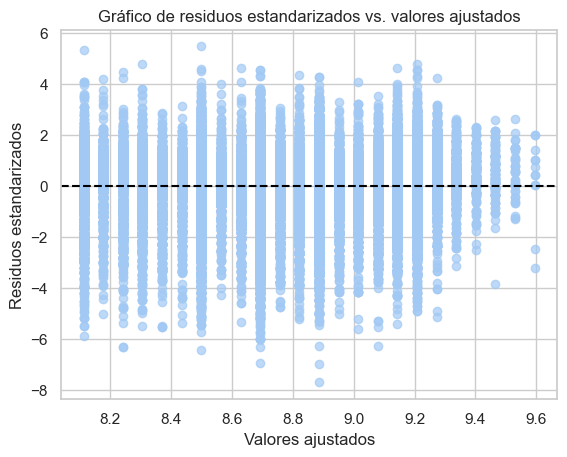

In [38]:
residuos_studentizados = results.get_influence().resid_studentized_internal
plt.scatter(valores_predichos, residuos_studentizados, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos estandarizados')
plt.title('Gráfico de residuos estandarizados vs. valores ajustados')
plt.show()

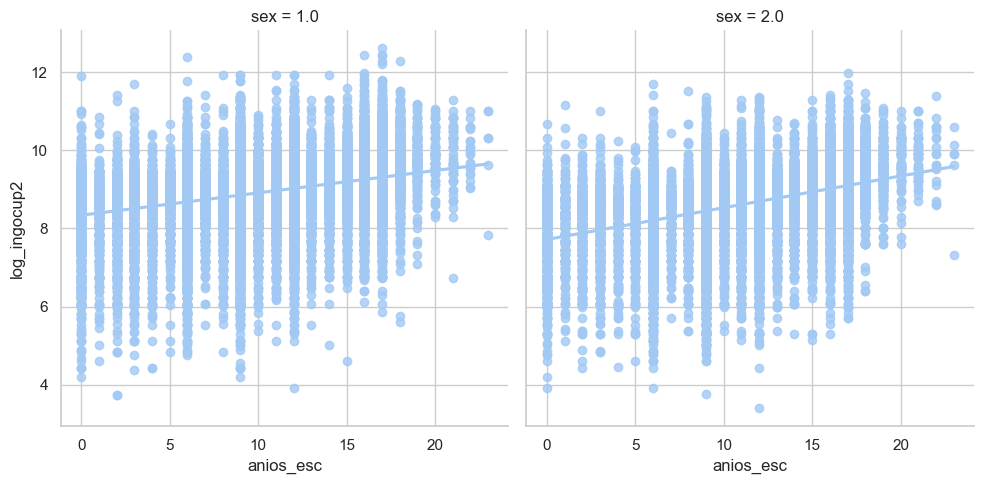

In [41]:
sns.lmplot(data=dmodelo, x='anios_esc',y='log_ingocup2',  col='sex')

In [44]:
x1 = dmodelo[['anios_esc', 'sex', 'eda']]
y = dmodelo['log_ingocup2']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_ingocup2   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     9210.
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:00:12   Log-Likelihood:            -1.2757e+05
No. Observations:              122137   AIC:                         2.551e+05
Df Residuals:                  122133   BIC:                         2.552e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4489      0.010    825.266      0.000       8.429       8.469
anios_esc      0.0703      0.000    144.175      0.000       0.069       0.071
sex           -0.3668      0.004    -91.646      0.000      -0.375      -0.359
eda            0.0031      0.000     21.372      0.000       0.003       0.003
==============================================================================
Omnibus:                    20756.781   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58122.618
Skew:                          -0.914   Prob(JB):                         0.00
Kurtosis:                       5.843   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""